## **Web-Based Loan Status Prediction**

Dataset Link : https://www.kaggle.com/datasets/ninzaami/loan-predication

### **Data Collection**

In [42]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [43]:
#Loading Dataset
data = pd.read_csv("loanstatus.csv")

In [44]:
#Size of Dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

Dataset contains 614 rows and 13 columns


In [45]:
#Sample of dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
#Statistical measures
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### **Data Cleaning**

**Dealing With Null Values**

In [48]:
#Percentage of missing/null values
data.isnull().sum()*100/len(data)


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [49]:
#Droping null values
data = data.dropna(subset=["Gender","Married","Dependents","LoanAmount","Loan_Amount_Term"])
#cheking null values
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [50]:
#EXploring Unique  values
data_attribute = ["Gender","Married", "Dependents","Education", "Self_Employed","Loan_Amount_Term","Credit_History",
                  	"Property_Area","Loan_Status"]
for column in data_attribute:
    print(f"The '{column}' column contains {data[column].nunique()} unique values:",data[column].unique())

The 'Gender' column contains 2 unique values: ['Male' 'Female']
The 'Married' column contains 2 unique values: ['Yes' 'No']
The 'Dependents' column contains 4 unique values: ['1' '0' '2' '3+']
The 'Education' column contains 2 unique values: ['Graduate' 'Not Graduate']
The 'Self_Employed' column contains 2 unique values: ['No' 'Yes' nan]
The 'Loan_Amount_Term' column contains 10 unique values: [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
The 'Credit_History' column contains 2 unique values: [ 1.  0. nan]
The 'Property_Area' column contains 3 unique values: ['Rural' 'Urban' 'Semiurban']
The 'Loan_Status' column contains 2 unique values: ['N' 'Y']


In [51]:
#Dependent column values
data["Dependents"].value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [52]:
#Replacing 3+ as 4
data.replace({"Dependents":{"3+":4}}, inplace=True)

In [53]:
#Dependents column values
data["Dependents"].value_counts()

0    316
1     96
2     96
4     45
Name: Dependents, dtype: int64

 **Visualizing Loan Status by Categorical Features**

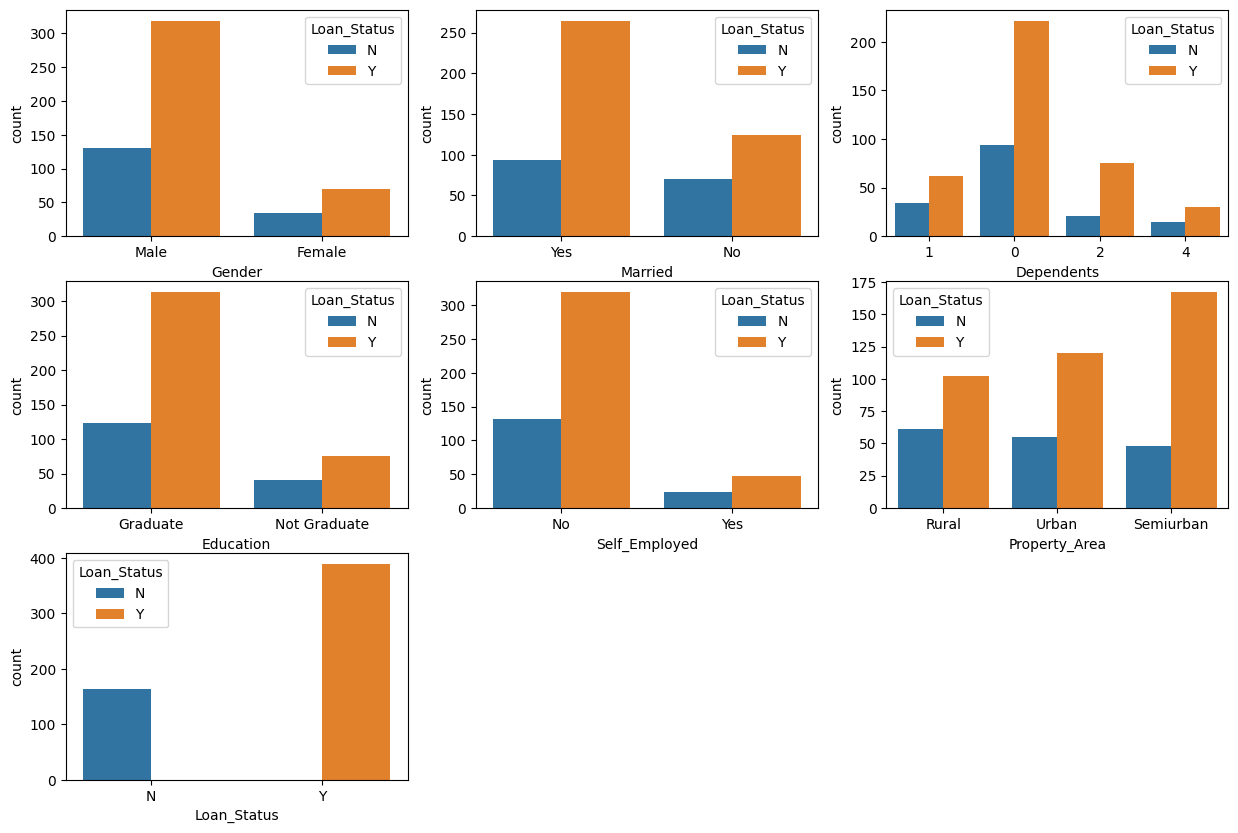

In [54]:
# Visualizing Loan Status by Categorical Features
features = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(15,10))
for feature in enumerate(features):
    plt.subplot(3,3, feature[0]+1)
    sns.countplot(data=data,x=feature[1],hue="Loan_Status")

In [55]:
# Droping LoanID column
data.drop("Loan_ID",inplace=True,axis=1)

In [56]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [57]:
#Separating Faetures and labels
X = data.drop("Loan_Status",axis=1)
Y = data["Loan_Status"]

**Spliting the dataset :Train and Test data**

In [58]:
# Split the  data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,random_state=21,test_size=0.15)

In [59]:
#  Size of train and test data
print("Train dataset size ",X_train.shape)
print("Test dataset size ",X_test.shape)


Train dataset size  (470, 11)
Test dataset size  (83, 11)


In [60]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [61]:
# Exploring Unique Values in X_train
data_attribute = ["Gender","Married", "Dependents","Education", "Self_Employed","Loan_Amount_Term","Credit_History",
                  	"Property_Area"]
for column in data_attribute:
     print(f"The '{column}' column contains {X_train[column].nunique()} unique values:",X_train[column].unique())

The 'Gender' column contains 2 unique values: ['Male' 'Female']
The 'Married' column contains 2 unique values: ['Yes' 'No']
The 'Dependents' column contains 4 unique values: ['0' 4 '1' '2']
The 'Education' column contains 2 unique values: ['Graduate' 'Not Graduate']
The 'Self_Employed' column contains 2 unique values: ['Yes' 'No' nan]
The 'Loan_Amount_Term' column contains 10 unique values: [360. 180. 240.  84. 480. 300.  60.  12. 120.  36.]
The 'Credit_History' column contains 2 unique values: [ 1. nan  0.]
The 'Property_Area' column contains 3 unique values: ['Urban' 'Rural' 'Semiurban']


In [62]:
data_attribute = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area"]
all_unique = True

for column in data_attribute:
    if X_train[column].nunique() != data[column].nunique():
        all_unique = False
        break

if all_unique:
    print("X_train dataset contains all unique values of data.")

X_train dataset contains all unique values of data.


### **Data Preprocessing**

In [63]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

step1 = ColumnTransformer(transformers=[
    ("pass1","passthrough",[0,1,2,3]),
    ("tnf_Si_1",SimpleImputer(strategy="most_frequent"),[4]),
    ("pass2","passthrough",[5,6,7,8]),
    ("tnf_Si_2",SimpleImputer(strategy="most_frequent"),[9]),
    ("pass_SI_3","passthrough",[10])
    ],remainder="passthrough")
step2 = ColumnTransformer(transformers=[
    ("tnf2",OrdinalEncoder(categories=[["Not Graduate","Graduate"],["Rural","Semiurban","Urban"]]),[3,10]),
    ("tnf3",OneHotEncoder(sparse=False,drop="first"),[0,1,4])
    ],remainder="passthrough")
step3 = StandardScaler()

#### **Model Buliding**

In [64]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
LR_pipe = Pipeline([
    ("step1",step1),
    ("step2",step2),
    ("step3",step3),
    ("step4",model)]
)

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
RF_pipe = Pipeline([
    ("step1",step1),
    ("step2",step2),
    ("step3",step3),
    ("step4",model)]
)

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
DT_pipe = Pipeline([
    ("step1",step1),
    ("step2",step2),
    ("step3",step3),
    ("step4",model)]
)

### **Algorithms Performance Summary**

In [65]:
results = pd.DataFrame(columns=["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score","Cross Validation Score","Accuracy Standard Deviation"])
algorithms = [
    ("Logistic Regression", LR_pipe),
    ("Decision Tree", DT_pipe),
    ("Random Forest", RF_pipe),
]
for algorithm_name, algorithm in algorithms:
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred).round(3)
    precision = precision_score(Y_test, y_pred).round(3)
    recall = recall_score(Y_test, y_pred).round(3)
    f1 = f1_score(Y_test, y_pred).round(3)
    accuracies = cross_val_score(estimator=algorithm,X=X_train,y=Y_train, cv=10)
    
    results = results.append({
        "Algorithm": algorithm_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Cross Validation Score":accuracies.mean().round(3),
        "Accuracy Standard Deviation":accuracies.std().round(3)
    }, ignore_index=True)

In [66]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cross Validation Score,Accuracy Standard Deviation
0,Logistic Regression,0.831,0.814,0.983,0.891,0.800,0.036
1,Decision Tree,0.651,0.764,0.724,0.743,0.687,0.056
2,Random Forest,0.807,0.818,0.931,0.871,0.781,0.036


#### **Best Model: Logistic Regression** 

**Logistic Regression Hyperparameter Tuning**

In [67]:
# Logistic Regression Hyperparameter Tuning
params_grid = [
    {"penalty":["l1","l2","elasticnet","none"],
     "C":np.logspace(-4,4,20),
     "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
     "max_iter":[100,1000,2500,5000]}
]
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(LogisticRegression(),param_grid=params_grid,cv=5,verbose=True,n_jobs=-1)
LR_pipe = Pipeline([
    ("step1",step1),
    ("step2",step2),
    ("step3",step3),
    ("step4",model)]
)
LR_pipe.fit(X_train,Y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass1', 'passthrough',
                                                  [0, 1, 2, 3]),
                                                 ('tnf_Si_1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('pass2', 'passthrough',
                                                  [5, 6, 7, 8]),
                                                 ('tnf_Si_2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [9]),
                                                 ('pass_SI_3', 'passthrough',
                                                  [10])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                           'max_iter': [100, 1000, 2500, 5000],
                                           'penalty': ['l1', 'l2', 'elasticnet',
                                                       'none'],
                                           'solver': ['lbfgs', 'newton-cg',
                                                      'liblinear', 'sag',
                                                      'saga']}],
                              verbose=True))])

In [68]:
# Best Hyperparameters for Logistic Regression
LR_pipe.named_steps["step4"].best_params_

{'C': 0.0006951927961775605,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [69]:
LR_pipe.named_steps["step4"].best_estimator_

LogisticRegression(C=0.0006951927961775605, solver='liblinear')

In [70]:
# Final Logistic Regression Model
final_LR = LR_pipe.named_steps["step4"].best_estimator_

In [71]:
# Final Logistic Regression Model Evaluation and Results
model = final_LR
LR_pipe = Pipeline([
    ("step1",step1),
    ("step2",step2),
    ("step3",step3),
    ("step4",model)]
)

y_pred = LR_pipe.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred).round(3)
precision = precision_score(Y_test, y_pred).round(3)
recall = recall_score(Y_test, y_pred).round(3)
f1 = f1_score(Y_test, y_pred).round(3)
accuracies = cross_val_score(estimator=LR_pipe,X=X_train,y=Y_train, cv=10)
cross_validation_score = accuracies.mean()
std_dev = accuracies.std()
results = results.append({
    "Algorithm": "Final LR",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Cross Validation Score":cross_validation_score.round(3),
    "Accuracy Standard Deviation":std_dev.round(3)
},ignore_index=True)

In [72]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cross Validation Score,Accuracy Standard Deviation
0,Logistic Regression,0.831,0.814,0.983,0.891,0.800,0.036
1,Decision Tree,0.651,0.764,0.724,0.743,0.687,0.056
2,Random Forest,0.807,0.818,0.931,0.871,0.781,0.036
3,Final LR,0.831,0.814,0.983,0.891,0.800,0.036


#### **Predicting one observation**

In [73]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [74]:
# Input values
input = [("Male", "Yes", 0, "Graduate", "Yes", 3000, 0, 66.0, 360.0, 1.0, "Urban")]

In [75]:
df = pd.DataFrame(input, columns=X_train.columns)
type(df)
if LR_pipe.predict(df)[0] ==1:
    print("Loan Approved")
else:
    print("Loan not Approved")

Loan Approved


### **Saving Data and Model with Pickle**

In [ ]:
# Saving Data and Model with Pickle
import pickle
pickle.dump(data,open("loan_data.pkl","wb"))
pickle.dump(LR_pipe,open("loan_pipe.pkl","wb"))